In [7]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Interpolação e extrapolação

Como resultado de experimentos ou simulações, as vezes temos um conjunto de pontos na forma:

\begin{equation}
data = \left((x_0,f(x_0)),(x_1,f(x_1)),\ldots,(x_n,f(y_n))\right)
\end{equation}

mas não temos uma expresão, $f(x)$ que nos permita calcular o valor da função em qualquer ponto arbitrario $x$. Muitas vezes os $x_i$ são igualmente espaçados, mas nem sempre.

Nossa tarefa é estimar essa função, $f(x)$ trazando uma curva suave a traves de todos, e quizas ultrapassando, os valores de $x$. Se o $x$ desejado se encontra entre o mínimo e o máximo dos dados, o problema é chamado *interpolação*. Se o $x$ está fora dos nossos dados o problema é chamado extrapolação.

Os dois problemas devem representar essa função com uma forma funcional que seja o mais geral possível. As formas funcionais mais comúns são os *polinomios*. Funções trigonométricas, senos e cosenos, também permitem fazer interpolação como os chamados métodos de Fourier que estudaremos em outro capítulo.  Nos casos onde a conservação da continuidade das derivadas é necessário, utilizam-se métodos *splines*. O mais conhecido desses métodos é o de *splines* cúbicos. 

Conceitualmente o processo da interpolação tem dois etapas: (1) ajustar uma função aos dados e (2) avaliar essa função ao ponto arbitrario $x$.   O número de pontos usado para realizar a interpolação representa a **ordem** da interpolação. 


Nesse capítulo vamos descrever em detalhe os métodos polinomial e de *splines* cubico.  As rotinas de interpolação são também rutinas de extrapolação, que no entanto, devem ser consideradas com muito cuidado. 


## Interpolação e extrapolação polinomial

Asumindo que temos um conjunto de $N+1$ pontos, queremos determinar um polinomio de grau N, tal que

\begin{equation}
P_N(x_i) = f(x_i) = y_i  \;\;, i = 0,1, \ldots , N \;.
\end{equation}

Se escrevemos $P_N$ da forma:

\begin{equation}
P_N(x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0)(x-x_1) + \ldots + a_N (x-x_0) \ldots (x-x_{N-1}) \;,
\end{equation}


Então a equação acima resulta num sistema triangular de equações:

\begin{eqnarray}
a_0 &=& f(x_0) \\\nonumber
a_0 + a_1 (x_1-x_0) &=& f(x_1) \\\nonumber
a_0 + a_1 (x_2-x_0) + a_1 (x_2-x_0)(x_2-x_1) &=& f(x_2) \\\nonumber
\ldots \; \ldots \; \ldots
\end{eqnarray}

Os coeficientes $a_0, \ldots, a_N$ podem ser determinados de forma recursiva, começando por $a_0$, depois $a_1$ e assim por diante. 

A fórmula clásica da interpolação foi criada por Lagrange e é dada por:

\begin{equation}
P_N(x) =  \sum_{i=0}^N y_i\left(\prod_{k \neq i} \frac{x-x_k}{x_i-x_k} \right)
\end{equation}

Se temos unicamente dois pontos (uma linha reta), então o polinomio ficara:

\begin{equation}
P_1(x) =  \frac{x - x_0}{x_1 - x_0} y_1 + \frac{x - x_1}{x0 - x_1} y_0
\end{equation}

e com 3 pontos (aproximação parabólica) temos:

\begin{equation}
P_1(x) =  \frac{(x - x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)} y_2 
       + \frac{(x - x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)} y_1 
       + \frac{(x - x_1)(x-x_2)}{(x_0 - x_1)(x_0-x_2)} y_0 
\end{equation}

E assim sucessivamente. Da equação acima é possivel ver que quando $x=x_i$, temos que $f(x) = f(x_i)$. 

O programa que estudaremos a seguir, baseia-se no método de diferenças finitas. A receita é bem simples. Se pegamos $x=x_0$ na equação (3), vamos ter o valor de $a_0 = f(x_0) = y_0$. 
Movendo $a_0$ à esquerda e dividindo por $(x-x_0)$ temos:

\begin{equation}
\frac{f(x) - f(x_0)}{x-x_0} = a_1 (x-x_0) + a_2 (x-x_0)(x-x_1) 
           + \ldots + a_N (x-x_0) \ldots (x-x_{N-1}) \;,
\end{equation}

A quantidade à esquerda:

\begin{equation}
f_{0x} = \frac{f(x) - f(x_0)}{x-x_0}  \;,
\end{equation}

é a diferência finita de primeira ordem.   Agora podemos considerar $x=x_1$, temos que $a_1 = f_{01}$. 

Movendo novamente $a_1$ à esquerda e dividindo dessa vez por $x-x_1$, obtemos:

$$
\frac{f_{0x} - f_{01}}{x - x_1} = + a_2 
           + \ldots + a_N (x-x_0) \ldots (x-x_{N-1}) \;,
$$

e a quantidade

$$
f_{01x} = \frac{f_{0x} - f_{01}}{x-x_1}  \;,
$$

é uma diferença dividida de segunda ordem, onde o coeficiente $a_1 = f_{01}$ é determinado a partir de $f_{0x}$, fazendo $x = x_1$.  Podemos continuar nesse raciocinio e definimos a diferença dividida de ordem $k+1$ como


\begin{equation}
f_{01 \ldots kx} = \frac{f_{01\ldots(k-1)x} - f_{01\ldots (k-1)k}}{x-x_k}  \;,
\end{equation}

o que implica que 

$$
a_k = f_{01 \ldots (k-1)k}
$$

Se substituimos $x_0, x_1, \ldots, x_k$ na equação (10) por $x_{i+1}, x_{i+2}, \ldots, x_k$, ou seja, contamos desde $i+1$ até $k$ em vez de contar desde $0$ até $k$ e substituimos $x$ por $x_i$, podemos construir um algoritmo recursivo para o cálculo das diferenças divididas.

$$
f_{x_i x_{i+1} \ldots x_{k}} = \frac{f_{x_{i+1} \ldots x_k} - f_{x_i x_{i+1} \ldots x_{k-1}}}  {x_k-x_i}  \;,
$$

asumindo que nossos dados se encontram numa tabela de valores $(x_j,f(x_j) = y_j)$ e precisamos construir os coeficientes para o polinomio $P_N(x)$.  A última equação pode ser melhor entendida na seguinte tabela para $N=3$.


\begin{matrix}
x_0 \; y_0 &               &                  & \\
           &  f_{x_0 x_1}  &                  & \\
x_1 \; y_1 &               &  f_{x_0 x_1 x_2} & \\
           &  f_{x_1 x_2}  &                  & f_{x_0 x_1 x_2 x_3}    \\
x_2 \; y_2 &               &  f_{x_1 x_2 x_3} & \\
           &  f_{x_2 x_3}  &                  & \\
x_3 \; y_3 &               &                  & \\           
\end{matrix}

Os coeficientes que procuramos para o polinomio serão os elementos ao longo da diagonal principal.  Veremos agora a implementação do algoritmo de Neville

In [9]:
import numpy as np
import matplotlib.pylab as plt

In [199]:
# Neville Algorithm
def polint(xa,ya,x):
    n = xa.size
    c = np.copy(ya)
    d = np.copy(ya)
    ns=1
    # dif eh a diferenca do valor de entrada x com o primeiro valor 
    # de nossos dados xa[0]
    # dift eh um array, com a diferenca entre x e cada um dos xa
    dif = abs(x - xa[0])
    dift = np.abs(x - xa)
    for i in range (n):
        if (dift[i] < dif):
            ns = i
            dif = dift[i]
    # depois desse loop ns é o índice de xa mais próximo de x
    # ya é o valor de ya nesse indice
    y = ya[ns]
    
    for m in range(n):
        for i in range(1,n-m):
            ho = xa[i] - x
            hp = xa[i+m] - x
            #print('ho, hp = ',m,i+m,ho,hp)
            w = c[i+1]-d[i]
            den = ho - hp
            if (den == 0):
                print('Error, den=0')
                break
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
                
    if (2*ns < n-m):
        y += c[ns+1]
    else:
        y += d[ns]
    return y

In [200]:
xb = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
yb = np.array([3.2, 4.5, 5.1, 6.7, 7.1, 7.9])

xx = np.linspace(0.1,0.6,12)
f = np.zeros_like(xx)
for j in range(xx.size):
    f[j] = polint(xb,yb,xx[j])

Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0
Error, den=0


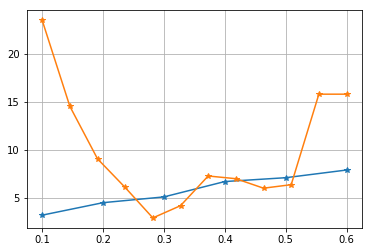

In [201]:
plt.plot(xb,yb,'-*')
plt.plot(xx,f, '-*')
plt.grid()

In [156]:
for i in range(6):
    for j in range(6-i-1):
        print(i,j)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
2 0
2 1
2 2
3 0
3 1
4 0
